# Training and test script of an ANN to classify OpenMP kernels

Load numpy, pandas and disable cuda devices

In [1]:
import numpy as np
import pandas as pd
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Load training dataset

In [2]:
dataset = pd.read_csv('train_ANN.csv', sep=';')

Shuffle dataset rows and show the different labels in the training dataset

In [4]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)
dataset['label'].unique()

array(['Matrix x Matrix', 'Stencil', 'Matrix x Vector', 'Triad', 'Stride',
       'Copy', 'Rows', 'Reduction'], dtype=object)

Show how many values exist for each label

In [5]:
print(dataset['label'].value_counts())

Rows               103200
Copy               103200
Stride             103200
Triad              103200
Reduction          103200
Matrix x Matrix    102168
Stencil            102168
Matrix x Vector    102168
Name: label, dtype: int64


Divide dataset in hardware performance counters and labels

In [6]:
X = dataset.iloc[:,1:19].values
y = dataset.iloc[:,0].values

Normalize data using scikit-learn normalizer:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

In [8]:
from sklearn.preprocessing import Normalizer
scaler_x = Normalizer()
scaler_x.fit(X)
X_scaled =  scaler_x.transform(X)

Encode labels in numeric categories

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [ ]:
Declare the weight clippling method used in the artificial neural network

In [10]:
from keras.constraints import Constraint
from keras import backend as K

class ClipWeights(Constraint):
    def __init__(self, low, high):
        self.low = low
        self.high = high
        
    def __call__(self, weight):
        return K.clip(weight, self.low, self.high)

Using TensorFlow backend.
c:\users\jordi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\jordi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\jordi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

Load keras NN libraries and create empty NN

In [11]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense, Dropout, GaussianNoise
from keras.optimizers import Adam


model = Sequential()

Add input layer for the 20 hardware counters
Add one hidden layer
And one output layer
Then compile the model

In [12]:
model.add(Dense(18, activation='selu', input_shape=(18,), kernel_constraint=ClipWeights(-10.0,10.0)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='selu', kernel_constraint=ClipWeights(-10.0,10.0)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax', kernel_constraint=ClipWeights(-10.0,10.0)))

model.compile(Adam(lr=0.001), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                304       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
Total params: 782
Trainable params: 782
Non-trainable params: 0
_________________________________________________________________


Train the neural network

In [13]:
history = model.fit(X_scaled,Y,batch_size=100,epochs=24,shuffle=True,validation_split=0.20)

Train on 658003 samples, validate on 164501 samples
Epoch 1/24
658003/658003 [==============================] - 8s 12us/step - loss: 0.3768 - acc: 0.8601 - val_loss: 0.1460 - val_acc: 0.9395
Epoch 2/24
658003/658003 [==============================] - 7s 11us/step - loss: 0.1201 - acc: 0.9588 - val_loss: 0.0972 - val_acc: 0.9567
Epoch 3/24
658003/658003 [==============================] - 7s 11us/step - loss: 0.0836 - acc: 0.9726 - val_loss: 0.0618 - val_acc: 0.9814
Epoch 4/24
658003/658003 [==============================] - 7s 11us/step - loss: 0.0694 - acc: 0.9770 - val_loss: 0.0784 - val_acc: 0.9637
Epoch 5/24
658003/658003 [==============================] - 7s 11us/step - loss: 0.0608 - acc: 0.9798 - val_loss: 0.0845 - val_acc: 0.9604
Epoch 6/24
658003/658003 [==============================] - 7s 11us/step - loss: 0.0559 - acc: 0.9816 - val_loss: 0.0400 - val_acc: 0.9925
Epoch 7/24
658003/658003 [==============================] - 8s 12us/step - loss: 0.0531 - acc: 0.9823 - val_loss: 

Show the training evolution of the model

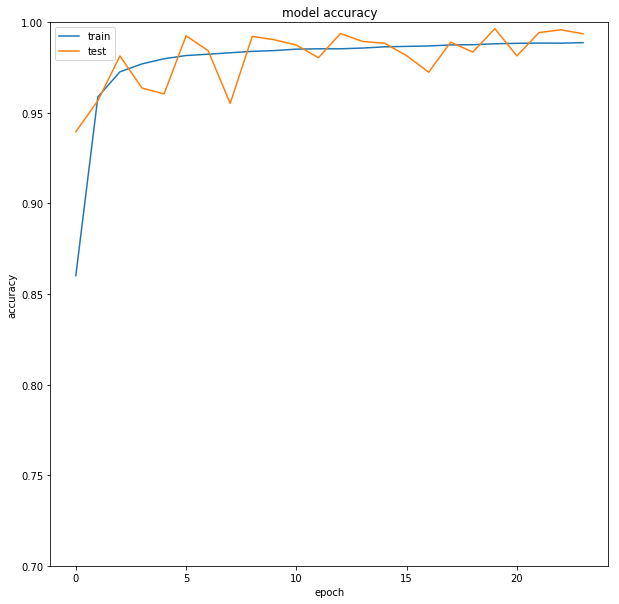

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.ylim(0.7,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Show the loss evolution of the model

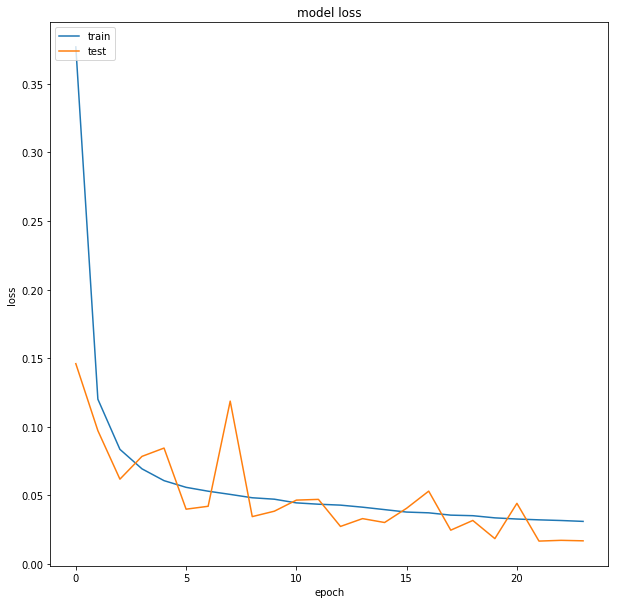

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Import validation dataset

In [ ]:
dataset_pred = pd.read_csv('test_ANN.csv', sep=';')

Normalize data to cycles

This dataset needs normalizing because storing the normalized dataset increases the size by aprox. 3x-4x

In [ ]:
dataset_pred1 = dataset_pred.copy()
cols = list(dataset_pred.columns)
cols.pop(0)
print(cols)
for col in cols:
    dataset_pred1[col] = dataset_pred[col].div(dataset_pred['PAPI_REF_CYC'], axis=0)

Copy the modified dataset into the original dataset and remove the auxiliar dataset

In [ ]:
dataset_pred = dataset_pred1.copy()
del dataset_pred1

Divide dataset hardware performance counters and labels

In [ ]:
X_pred = dataset_pred.iloc[:,1:21].values
y_pred = dataset_pred.iloc[:,0].values

Normalize the data

In [ ]:
X_pred_scaled = scaler_x.fit_transform(X_pred)

Use the network to predict the labels and transform the output to the pattern's labels

In [ ]:
from keras.utils import to_categorical
predictions = model.predict_classes(X_pred_scaled)
prediction_ = np.argmax(to_categorical(predictions), axis = 1)
prediction_ = encoder.inverse_transform(prediction_)

Make prediction output readable

In [ ]:
predicted_as={}
for i, j in zip(prediction_ , y_pred):
    pattern_as = str(j + " -- predicted as: " + i)
    if pattern_as not in predicted_as:
        predicted_as[pattern_as] = 0
    predicted_as[pattern_as] = predicted_as[pattern_as] + 1

Print predictions

In [ ]:
for i in sorted(predicted_as):
    print ( i , " --> ", predicted_as[i] )
